In [7]:
##### Plot the output of different sized ESNs with optimal parameters
## optimal "First module"= bigESN with 50 Neurons
## optimal modular Approach
## bigESN with 100 Neurons
## Non-optimal parameter ESN
## swapped non-optimal parameters
import Parity_Data_Generator
import numpy as np
from ESN import ESN
import time

rng = np.random.RandomState(42)

N = 4000   
n = 3       # n-parity
timescale=50

start_time = time.time()
# produce Data
bits, parity, target = Parity_Data_Generator.generateParityData(N, n, timescale=timescale, randomstate=rng)

# Divide in training and test data
traintest_cutoff = int(np.ceil(0.7 * len(bits)))
train_bits, test_bits = bits[:traintest_cutoff], bits[traintest_cutoff:]
train_parity, test_parity = parity[:traintest_cutoff], parity[traintest_cutoff:]
train_targets, test_targets = target[:traintest_cutoff], target[traintest_cutoff:]

#### optimal first module
firstModuleESN = ESN(inputs=1,
                      neurons=50,  
                      spectral_radius=0.73,  # high spectral rad is better (high fluctuations 0->1->0)
                      leak_rate= 0.41,   # adjust leak_rate
                      dt= 0.1,
                      sparsity=0.95,
                      noise=0.01,
                      input_scale=2,
                      input_shift=-1)
firstModuleESN.train(train_bits, train_targets)
predictedTargetFirstModule = firstModuleESN.predict(test_bits)
test_error_FirstModule = np.sqrt(np.mean((predictedTargetFirstModule - test_targets) ** 2))

##### optimal modular ESN (uses optimal first module's output)
train_predicted_parity = firstModuleESN.predict(train_bits, readout_weights=np.eye(50))
test_predicted_parity = firstModuleESN.predict(test_bits, readout_weights=np.eye(50))
modularESN= ESN(inputs=50,
                      neurons=50,  
                      spectral_radius=0.52,  # high spectral rad is better (high fluctuations 0->1->0)
                      leak_rate= 0.41,   # adjust leak_rate
                      dt= 0.1,
                      sparsity=0.7,
                      noise=0.01,
                      input_scale=0.85,
                      input_shift=0)
modularESN.train(train_predicted_parity, train_targets)
predictedTargetModularESN = modularESN.predict(test_predicted_parity)
test_error_modularESN = np.sqrt(np.mean((predictedTargetModularESN - test_targets) ** 2))

##### bigESN (100 Neurons)
bigESN = ESN(inputs=1,
                      neurons=100,  
                      spectral_radius=0.73,  # high spectral rad is better (high fluctuations 0->1->0)
                      leak_rate= 0.41,   # adjust leak_rate
                      dt= 0.1,
                      sparsity=0.95,
                      noise=0.01,
                      input_scale=2,
                      input_shift=-1)
bigESN.train(train_bits, train_targets)
predictedTargetbigESN = bigESN.predict(test_bits)
test_error_bigESN = np.sqrt(np.mean((predictedTargetbigESN - test_targets) ** 2))

######### Try changing parameters of first and second module
#### non-optimal first module
nonOptFirstModuleESN = ESN(inputs=1,
                      neurons=50,  
                      spectral_radius=1.58,  # high spectral rad is better (high fluctuations 0->1->0)
                      leak_rate= 0.41,   # adjust leak_rate
                      dt= 0.1,
                      sparsity=0.95,
                      noise=0.01,
                      input_scale=2,
                      input_shift=-1)

##### non-optimal ModularESN
train_predicted_parity = nonOptFirstModuleESN.predict(train_bits, readout_weights=np.eye(50))
test_predicted_parity = nonOptFirstModuleESN.predict(test_bits, readout_weights=np.eye(50))
nonOptModularESN= ESN(inputs=50,
                      neurons=50,  
                      spectral_radius=1.58,  # high spectral rad is better (high fluctuations 0->1->0)
                      leak_rate= 1.03,   # adjust leak_rate
                      dt= 0.1,
                      sparsity=0.7,
                      noise=0.01,
                      input_scale=0.85,
                      input_shift=0)
nonOptModularESN.train(train_predicted_parity, train_targets)
predictedTargetnonOptModularESN = nonOptModularESN.predict(test_predicted_parity)
test_error_nonOptModularESN = np.sqrt(np.mean((predictedTargetnonOptModularESN - test_targets) ** 2))

###### changed parameter ESN
swappedFirstModuleESN = ESN(inputs=1,
                      neurons=50,  
                      spectral_radius=1.58,  # high spectral rad is better (high fluctuations 0->1->0)
                      leak_rate= 1.03,   # adjust leak_rate
                      dt= 0.1,
                      sparsity=0.95,
                      noise=0.01,
                      input_scale=2,
                      input_shift=-1)

##### normalModularESN
train_predicted_parity = swappedFirstModuleESN.predict(train_bits, readout_weights=np.eye(50))
test_predicted_parity = swappedFirstModuleESN.predict(test_bits, readout_weights=np.eye(50))
swappedModularESN= ESN(inputs=50,
                      neurons=50,  
                      spectral_radius=1.58,  # high spectral rad is better (high fluctuations 0->1->0)
                      leak_rate= 0.41,   # adjust leak_rate
                      dt= 0.1,
                      sparsity=0.7,
                      noise=0.01,
                      input_scale=0.85,
                      input_shift=0)
swappedModularESN.train(train_predicted_parity, train_targets)
predictedTargetswappedModularESN = swappedModularESN.predict(test_predicted_parity)
test_error_swappedModularESN = np.sqrt(np.mean((predictedTargetswappedModularESN - test_targets) ** 2))
print("Error bigESN", test_error_bigESN)
print("Error firstModule", test_error_FirstModule)
print("Error modularESN", test_error_modularESN)
print("Error nonOpt modularESN", test_error_nonOptModularESN)
print("Error swapped-parameter Modular ESN", test_error_swappedModularESN)
print("--- {} seconds ---".format(time.time() - start_time))

C:\Users\hans-\Documents\PyCharmProjects\BA-ESN\BlockedLeastSquares.py:101: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self._LHS == None:
C:\Users\hans-\Documents\PyCharmProjects\BA-ESN\ESN.py:60: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if readout_weights == None:


Error bigESN 0.214983153508
Error firstModule 0.286789918191
Error modularESN 0.256400261111
Error nonOpt modularESN 0.331628940823
Error swapped-parameter Modular ESN 0.502053295967
--- 42.19397521018982 seconds ---


In [18]:
import pickle
#### Save Data
# with open('picklefiles/outputPlots.p', 'wb') as outputFile:
#     pickle.dump(predictedTargetbigESN, outputFile)
#     pickle.dump(predictedTargetModularESN, outputFile)
#     pickle.dump(predictedTargetnonOptModularESN, outputFile)
#     pickle.dump(predictedTargetswappedModularESN, outputFile)
#     pickle.dump(predictedTargetFirstModule, outputFile)
#     pickle.dump(test_targets, outputFile)
#### Load Data
# with open('picklefiles/outputPlots.p', 'rb') as inputFile:
#     predictedTargetbigESN = pickle.load(inputFile)
#     predictedTargetModularESN = pickle.load(inputFile)
#     predictedTargetnonOptModularESN = pickle.load(inputFile)
#     predictedTargetswappedModularESN = pickle.load(inputFile)
#     predictedTargetFirstModule = pickle.load(inputFile)
#     test_targets = pickle.load(inputFile)

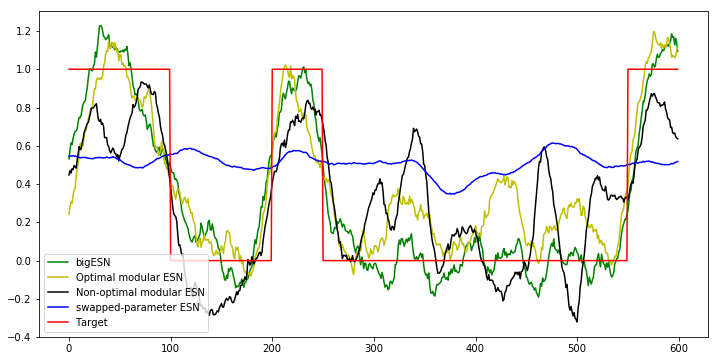

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
left = 15000
right = left+600
# plt.plot(predictedTargetFirstModule[left:right],"p", label="First module")
plt.plot(predictedTargetbigESN[left:right],"g", label="bigESN")
plt.plot(predictedTargetModularESN[left:right],"y", label="Optimal modular ESN")
plt.plot(predictedTargetnonOptModularESN[left:right],"black", label="Non-optimal modular ESN")
plt.plot(predictedTargetswappedModularESN[left:right],"b", label="swapped-parameter ESN")
plt.plot(test_targets[left:right], "r", label="Target")
plt.legend(loc=3)
plt.savefig("Output plots.png", dpi=300)
plt.show()